<a href="https://colab.research.google.com/github/Pelleykiranmai/Data_Analysis_Works_/blob/main/week6_tue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate customer purchase data
np.random.seed(42)

# Generate skewed spending data (log-normal for realism: many small spends, few high spends)
purchase_values = np.random.lognormal(mean=7.5, sigma=0.5, size=5000)

# Scale and clip between ₹50 and ₹5000
purchase_values = np.clip(purchase_values, 50, 5000)

# Convert to DataFrame
df = pd.DataFrame(purchase_values, columns=["Purchase"])
print(df.head())

      Purchase
0  2317.761380
1  1687.271236
2  2499.495696
3  3871.955394
4  1608.284421


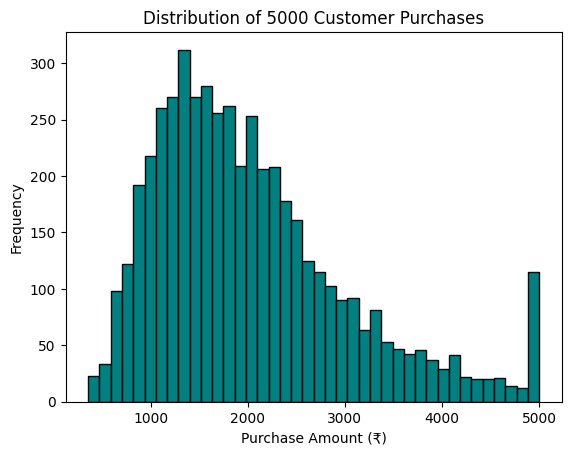

In [ ]:
# Histogram of original purchase values
plt.hist(df["Purchase"], bins=40, color='teal', edgecolor='black')
plt.title("Distribution of 5000 Customer Purchases")
plt.xlabel("Purchase Amount (₹)")
plt.ylabel("Frequency")
plt.show()

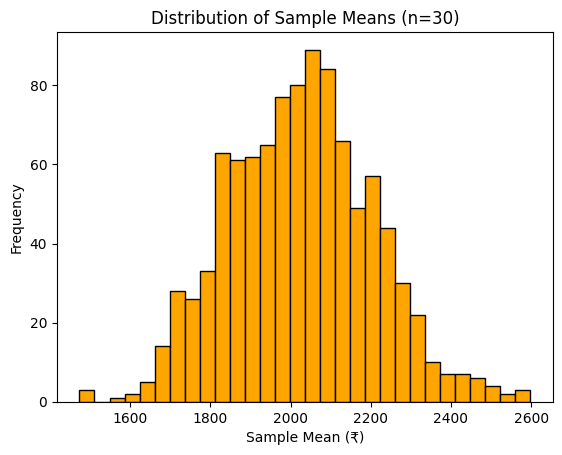

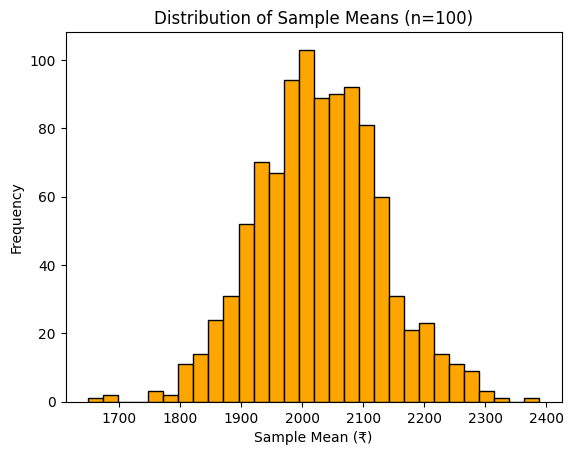

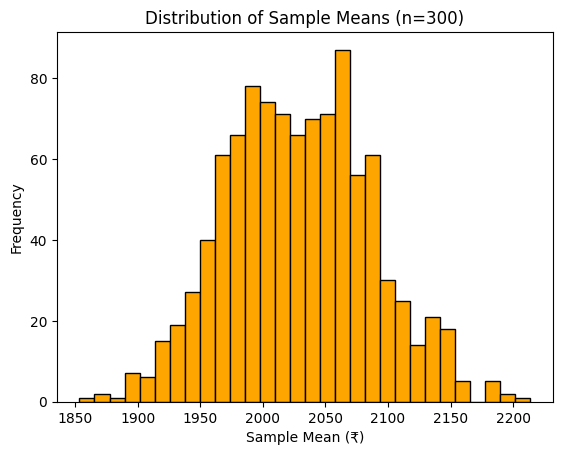

In [ ]:
def sample_means(sample_size, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = df["Purchase"].sample(sample_size, replace=True)
        means.append(sample.mean())
    return means

# Example sample sizes
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    means = sample_means(size)
    plt.hist(means, bins=30, color='orange', edgecolor='black')
    plt.title(f"Distribution of Sample Means (n={size})")
    plt.xlabel("Sample Mean (₹)")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Original dataset stats
orig_mean = df["Purchase"].mean()
orig_median = df["Purchase"].median()
orig_var = df["Purchase"].var()
orig_std = df["Purchase"].std()

print("Original Purchase Data Statistics:")
print(f"Mean: {orig_mean:.2f} | Median: {orig_median:.2f} | Variance: {orig_var:.2f} | Std Dev: {orig_std:.2f}")

# Compare sample means distribution
for size in sample_sizes:
    means = sample_means(size)
    print(f"\nSample Size: {size}")
    print(f"Mean of Sample Means: {np.mean(means):.2f}")
    print(f"Std Dev of Sample Means: {np.std(means):.2f}")

Original Purchase Data Statistics:
Mean: 2029.05 | Median: 1820.26 | Variance: 989944.63 | Std Dev: 994.96

Sample Size: 30
Mean of Sample Means: 2035.70
Std Dev of Sample Means: 177.88

Sample Size: 100
Mean of Sample Means: 2030.12
Std Dev of Sample Means: 99.24

Sample Size: 300
Mean of Sample Means: 2028.86
Std Dev of Sample Means: 58.09


Enter a sample size (e.g., 50, 150, 500): 5000


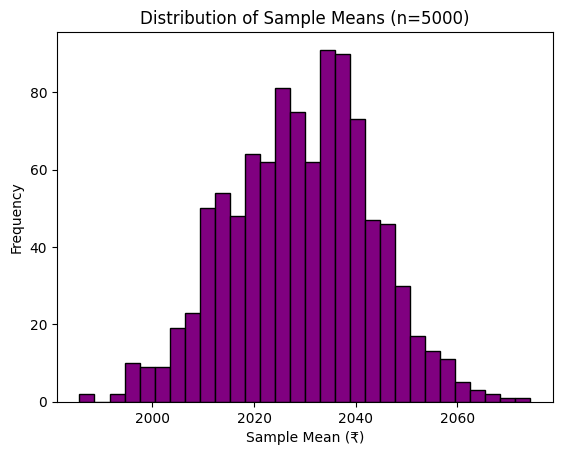

In [ ]:
# User-defined sample size
sample_size = int(input("Enter a sample size (e.g., 50, 150, 500): "))
means = sample_means(sample_size)

plt.hist(means, bins=30, color='purple', edgecolor='black')
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean (₹)")
plt.ylabel("Frequency")
plt.show()